##  Capstone: Exploratory Data Analysis (EDA)

This section includes:
- Histograms and bi-plots for feature exploration
- Correlation matrix with heatmap
- Basic statistical summaries
- Feature relationship observations

All visualizations and summaries help guide feature selection and model preparation.

In [17]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
# Read the cleaned CSVs
stats_df = pd.read_csv("advanced_player_stats_checked.csv")
raw_stats = pd.read_csv("nba_player_stats_checked.csv")
salary_df = pd.read_csv("nba_salary_checked.csv")

# Merge advanced_stats and raw_stats on Player, Team, Pos, and Age
merged = pd.merge(stats_df, raw_stats, on='Player', how='inner')
merged = pd.merge(merged, salary_df, on='Player', how='left')

# Rename and clean the salary column
merged = merged.rename(columns={"2024-25": "Salary"})
merged['Salary'] = merged['Salary'].replace(r'[\$,]', '', regex=True).astype(float)

In [26]:
#Drop rows missing Salary or PER
merged = merged.dropna(subset=['Salary', 'PER'])

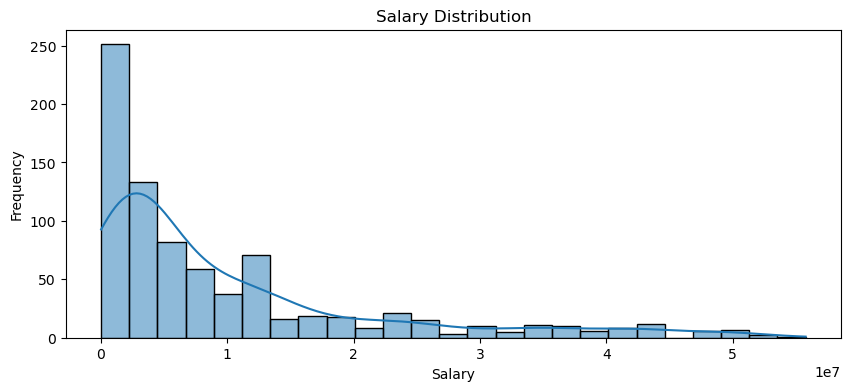

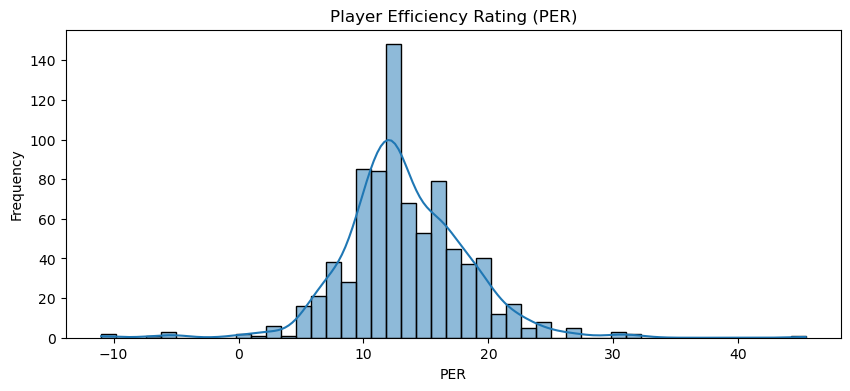

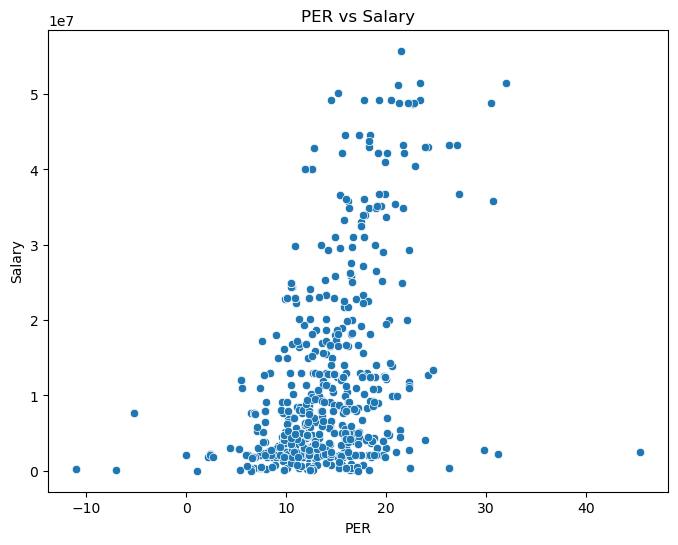

In [27]:
# Exploratory Data Analysis (EDA)

# Histograms
plt.figure(figsize=(10, 4))
sns.histplot(merged['Salary'], kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(merged['PER'], kde=True)
plt.title("Player Efficiency Rating (PER)")
plt.xlabel("PER")
plt.ylabel("Frequency")
plt.show()

# Bi- Plot: PER vs Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x='PER', y='Salary')
plt.title("PER vs Salary")
plt.xlabel("PER")
plt.ylabel("Salary")
plt.show()

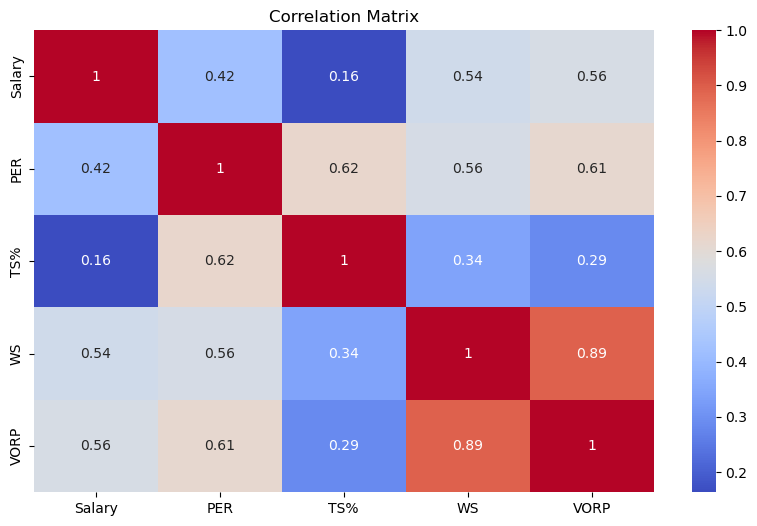

In [28]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = merged[['Salary', 'PER', 'TS%', 'WS', 'VORP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [29]:
# Pearson Correlation Coefficient
pearson_corr, p_val = stats.pearsonr(merged['PER'], merged['Salary'])
print(f"Pearson correlation between PER and Salary: {pearson_corr:.2f}, p-value: {p_val:.4f}")

Pearson correlation between PER and Salary: 0.42, p-value: 0.0000


In [ ]:
# Hypothesis Testing
avg_per = merged['PER'].mean()
high_per = merged[merged['PER'] > avg_per]['Salary']
low_per = merged[merged['PER'] <= avg_per]['Salary']
t_stat, p_val = stats.ttest_ind(high_per, low_per, equal_var=False)

In [ ]:
#t-test
print("\nT-test comparing Salary by above/below average PER:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

In [35]:
# Linear Regression Model
features = merged[['PER', 'TS%', 'WS', 'VORP']]
target = merged['Salary']
# Drop rows where any of the selected features or salary are missing
model_data = merged[['PER', 'TS%', 'WS', 'VORP', 'Salary']].dropna()

# Redefine features and target from the cleaned dataset
features = model_data[['PER', 'TS%', 'WS', 'VORP']]
target = model_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
# Model Evaluation
print("\nModel Evaluation")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


Model Evaluation
R-squared: 0.29
RMSE: 9589830.36


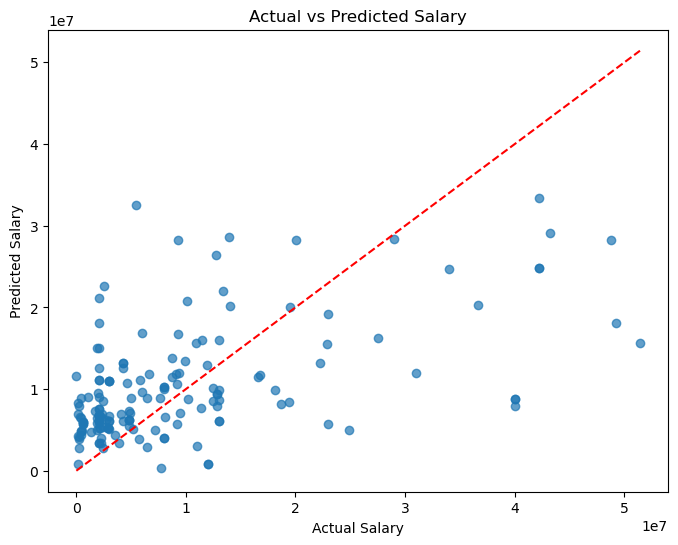

In [34]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In [36]:
# Conclusion
print("""
Conclusion:
This EDA shows that player efficiency metrics such as PER, TS%, WS, and VORP have measurable relationships with NBA salary.
We confirmed this with visualizations, a strong Pearson correlation (e.g., PER vs Salary), and hypothesis testing that showed
players with above-average PER earn significantly more on average. Our linear regression model reinforced these findings with
an R^2 score and RMSE that confirm a reasonable prediction ability.

Next steps could include experimenting with additional advanced stats, normalizing salary by minutes played, or incorporating
position and team context to further refine predictions.
""")


Conclusion:
This EDA shows that player efficiency metrics such as PER, TS%, WS, and VORP have measurable relationships with NBA salary.
We confirmed this with visualizations, a strong Pearson correlation (e.g., PER vs Salary), and hypothesis testing that showed
players with above-average PER earn significantly more on average. Our linear regression model reinforced these findings with
an R^2 score and RMSE that confirm a reasonable prediction ability.

Next steps could include experimenting with additional advanced stats, normalizing salary by minutes played, or incorporating
position and team context to further refine predictions.

